In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import cv2
from tqdm import tqdm
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling2D, Conv2D, MaxPool1D, Dropout
from keras import optimizers
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
path_daisy = 'daisy/'
path_dandelion = 'dandelion/'
path_rose = 'rose/'
path_sunflower = 'sunflower/'
path_tulip = 'tulip/'

In [4]:
daisy = os.listdir(path_daisy)
dandelion = os.listdir(path_dandelion)
rose = os.listdir(path_rose)
sunflower = os.listdir(path_sunflower)
tulip = os.listdir(path_tulip)

In [5]:
print('No. of samples:\ndaisy =\t',len(daisy),'\ndandelion =\t',len(dandelion),'\nrose =\t',len(rose),'\nsunflower =\t',len(sunflower),'\ntulip =\t',len(tulip))

No. of samples:
daisy =	 675 
dandelion =	 915 
rose =	 707 
sunflower =	 663 
tulip =	 802


In [6]:
totalSamples = len(dandelion)+len(daisy)+len(rose)+len(sunflower)+len(tulip)

In [7]:
print(totalSamples)

3762


In [8]:
target = ['daisy','dandelion','rose','sunflower','tulip']

In [9]:
y_daisy = [0]*len(daisy)
y_dandelion = [1]*len(dandelion)
y_rose = [2]*len(rose)
y_sunflower = [3]*len(sunflower)
y_tulip = [4]*len(tulip)

In [10]:
pixel = 50;

In [11]:
def resizer(pic):
    pic = cv2.resize(pic,(pixel,pixel))
    #pic = pic.reshape(1,pic.shape[0]*pic.shape[1]*pic.shape[2])
    pic = pic/255
    return pic

In [12]:
#img_daisy = np.zeros((len(daisy),1))
img_flowers = []
'''img_dandelion = np.zeros((len(dandelion),1))
img_rose = np.zeros((len(rose),1))
img_sunflower = np.zeros((len(sunflower),1))
img_tulip = np.zeros((len(tulip),1))
'''

'img_dandelion = np.zeros((len(dandelion),1))\nimg_rose = np.zeros((len(rose),1))\nimg_sunflower = np.zeros((len(sunflower),1))\nimg_tulip = np.zeros((len(tulip),1))\n'

In [13]:
i = 0
for i in tqdm(range(len(daisy))):
    pic = cv2.imread(path_daisy+daisy[i])
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = resizer(pic)
    img_flowers.append(pic)

100%|███████████████████████████████████████████████████████████████████████████████| 675/675 [00:01<00:00, 337.67it/s]


In [14]:
i = 0
for i in tqdm(range(len(dandelion))):
    pic = cv2.imread(path_dandelion+dandelion[i])
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = resizer(pic)
    img_flowers.append(pic)

100%|███████████████████████████████████████████████████████████████████████████████| 915/915 [00:03<00:00, 297.33it/s]


In [15]:
i = 0
for i in tqdm(range(len(rose))):
    pic = cv2.imread(path_rose+rose[i])
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = resizer(pic)
    img_flowers.append(pic)

100%|███████████████████████████████████████████████████████████████████████████████| 707/707 [00:02<00:00, 345.49it/s]


In [16]:
i = 0
for i in tqdm(range(len(sunflower))):
    pic = cv2.imread(path_sunflower+sunflower[i])
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = resizer(pic)
    img_flowers.append(pic)

100%|███████████████████████████████████████████████████████████████████████████████| 663/663 [00:02<00:00, 298.45it/s]


In [17]:
i = 0
for i in tqdm(range(len(tulip))):
    pic = cv2.imread(path_tulip+tulip[i])
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    pic = resizer(pic)
    img_flowers.append(pic)

100%|███████████████████████████████████████████████████████████████████████████████| 802/802 [00:02<00:00, 356.53it/s]


In [18]:
img_flowers = np.array(img_flowers)

In [19]:
img_flowers.shape

(3762, 50, 50, 3)

In [20]:
Y = y_daisy+y_dandelion+y_rose+y_sunflower+y_tulip
Y = np.array(Y)
Y = np.reshape(Y,(Y.shape[0],1))

In [21]:
Y.shape

(3762, 1)

In [22]:
img_flowers.shape

(3762, 50, 50, 3)

In [23]:
dataAndLabel = []

In [24]:
for i in tqdm(range(Y.shape[0])):
    dataAndLabel.append([img_flowers[i],Y[i,0]])

100%|██████████████████████████████████████████████████████████████████████████████████████| 3762/3762 [00:00<?, ?it/s]


In [25]:
dataAndLabel = np.array(dataAndLabel)

In [26]:
print(type(dataAndLabel[0]))
print(dataAndLabel[0].shape)

<class 'numpy.ndarray'>
(2,)


In [27]:
np.random.seed(110)
np.random.shuffle(dataAndLabel)

0


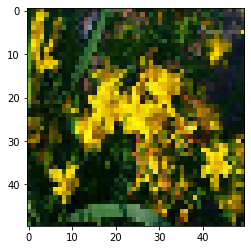

In [28]:
plt.imshow(dataAndLabel[0][0])
print(dataAndLabel[0][1])
plt.show()

In [29]:
type(dataAndLabel[0][1])

numpy.int32

In [30]:
X_data = []
Y_data = []
for i in tqdm(range(Y.shape[0])):
    X_data.append(dataAndLabel[i][0])
    Y_data.append(dataAndLabel[i][1])

100%|██████████████████████████████████████████████████████████████████████████| 3762/3762 [00:00<00:00, 240790.04it/s]


In [31]:
X_data = np.array(X_data)
Y_data = np.array(Y_data)
Y_data = np.reshape(Y_data,(Y_data.shape[0],1))
Y_data = to_categorical(Y_data)

In [32]:
print(X_data.shape,'\t',type(X_data))
print(Y_data.shape,'\t',type(Y_data))

(3762, 50, 50, 3) 	 <class 'numpy.ndarray'>
(3762, 5) 	 <class 'numpy.ndarray'>


In [33]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_data,Y_data,test_size=0.20,random_state=42)

In [34]:
Xtrain.shape

(3009, 50, 50, 3)

[0. 1. 0. 0. 0.]


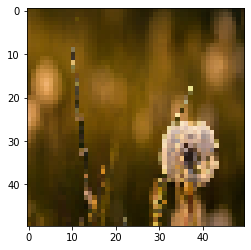

In [35]:
plt.imshow(Xtrain[100])
print(Ytrain[100])

In [36]:
'''model definition'''
model = Sequential()
model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(pixel,pixel,3),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=3, activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=3, activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=3, activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
#model.add(Dense(256,activation='sigmoid'))
#model.add(Dropout(0.2))
#model.add(Dense(10,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

W1218 02:00:57.111282 11612 deprecation_wrapper.py:119] From g:\anaconda3\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [37]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
adam = optimizers.Adam(learning_rate=1)
rmsprop = optimizers.RMSprop(learning_rate=1)
adagrad = optimizers.Adagrad(learning_rate=1)

In [38]:
model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy']) #huber_loss, squared_hinge, categorical_crossentropy

In [39]:
history = model.fit(Xtrain, Ytrain,validation_split=0.15,batch_size =512, epochs=100,verbose=2)

W1218 02:01:00.415912 11612 deprecation_wrapper.py:119] From g:\anaconda3\envs\tf_gpu\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 2557 samples, validate on 452 samples
Epoch 1/100
 - 6s - loss: 1.5991 - accuracy: 0.2483 - val_loss: 1.5797 - val_accuracy: 0.3230
Epoch 2/100
 - 2s - loss: 1.5545 - accuracy: 0.3246 - val_loss: 1.5136 - val_accuracy: 0.3827
Epoch 3/100
 - 2s - loss: 1.4856 - accuracy: 0.4036 - val_loss: 1.4168 - val_accuracy: 0.3960
Epoch 4/100
 - 1s - loss: 1.3982 - accuracy: 0.4259 - val_loss: 1.2997 - val_accuracy: 0.4314
Epoch 5/100
 - 2s - loss: 1.3356 - accuracy: 0.4372 - val_loss: 1.2198 - val_accuracy: 0.4735
Epoch 6/100
 - 2s - loss: 1.2467 - accuracy: 0.4787 - val_loss: 1.1428 - val_accuracy: 0.5155
Epoch 7/100
 - 2s - loss: 1.1952 - accuracy: 0.5014 - val_loss: 1.1107 - val_accuracy: 0.5044
Epoch 8/100
 - 2s - loss: 1.1585 - accuracy: 0.5072 - val_loss: 1.1318 - val_accuracy: 0.5199
Epoch 9/100
 - 2s - loss: 1.1203 - accuracy: 0.5327 - val_loss: 1.0781 - val_accuracy: 0.5354
Epoch 10/100
 - 2s - loss: 1.0872 - accuracy: 0.5549 - val_loss: 1.0394 - val_accuracy: 0.5642
Epoch 11/100

Epoch 87/100
 - 1s - loss: 0.4183 - accuracy: 0.8616 - val_loss: 0.6522 - val_accuracy: 0.7699
Epoch 88/100
 - 2s - loss: 0.4349 - accuracy: 0.8573 - val_loss: 0.6787 - val_accuracy: 0.7566
Epoch 89/100
 - 2s - loss: 0.4306 - accuracy: 0.8596 - val_loss: 0.6844 - val_accuracy: 0.7566
Epoch 90/100
 - 1s - loss: 0.4066 - accuracy: 0.8655 - val_loss: 0.6798 - val_accuracy: 0.7544
Epoch 91/100
 - 1s - loss: 0.4077 - accuracy: 0.8702 - val_loss: 0.6828 - val_accuracy: 0.7611
Epoch 92/100
 - 2s - loss: 0.4265 - accuracy: 0.8596 - val_loss: 0.6920 - val_accuracy: 0.7611
Epoch 93/100
 - 2s - loss: 0.4134 - accuracy: 0.8643 - val_loss: 0.7119 - val_accuracy: 0.7500
Epoch 94/100
 - 1s - loss: 0.4342 - accuracy: 0.8455 - val_loss: 0.7804 - val_accuracy: 0.7035
Epoch 95/100
 - 2s - loss: 0.4272 - accuracy: 0.8514 - val_loss: 0.6869 - val_accuracy: 0.7434
Epoch 96/100
 - 2s - loss: 0.4339 - accuracy: 0.8506 - val_loss: 0.6548 - val_accuracy: 0.7699
Epoch 97/100
 - 1s - loss: 0.4131 - accuracy: 0.86

In [40]:
model.evaluate(Xtest,Ytest)

753/753 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 2ms/step


[0.7503187540834485, 0.7330677509307861]

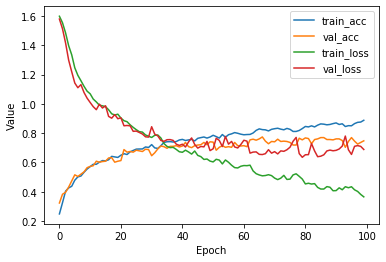

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(['train_acc','val_acc','train_loss','val_loss'])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 32)         

In [45]:
model.save('FlowerClassification-73.30.h5')

In [44]:
#To load the model, remove the ''' ''' below
'''
from keras.models import load_model

new_model = load_model('FlowerClassification-66.24.h5')
target = ['daisy','dandelion','rose','sunflower','tulip']

pic = cv2.imread('Rose_test.jpg')
pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
pic = resizer(pic)

pr = new_model.predict_classes(pic.reshape((1, 50, 50, 3)))
print('Predicted flower - ',target[pr[0]])'''

"\nfrom keras.models import load_model\n\nnew_model = load_model('FlowerClassification-66.24.h5')\ntarget = ['daisy','dandelion','rose','sunflower','tulip']\n\npic = cv2.imread('Rose_test.jpg')\npic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)\npic = resizer(pic)\n\npr = new_model.predict_classes(pic.reshape((1, 50, 50, 3)))\nprint('Predicted flower - ',target[pr[0]])"